In [1]:
# Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

In [2]:
#Importando os dados
df_train = pd.read_csv('train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
df_train['SalePrice'].mean()

np.float64(180921.19589041095)

In [ ]:
# Separar X e y
y = df_train["SalePrice"]
X = df_train.drop(columns=["SalePrice", "Id"])  # Remove Id

# Preencher valores ausentes
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [5]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


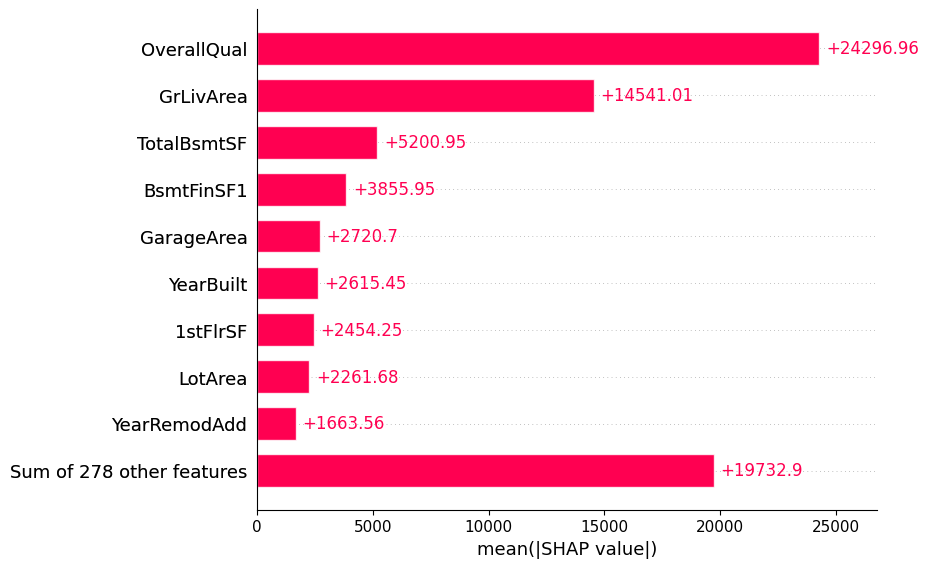

In [6]:
import shap

# Criar objeto SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plotar a importância das variáveis
shap.plots.bar(shap_values)

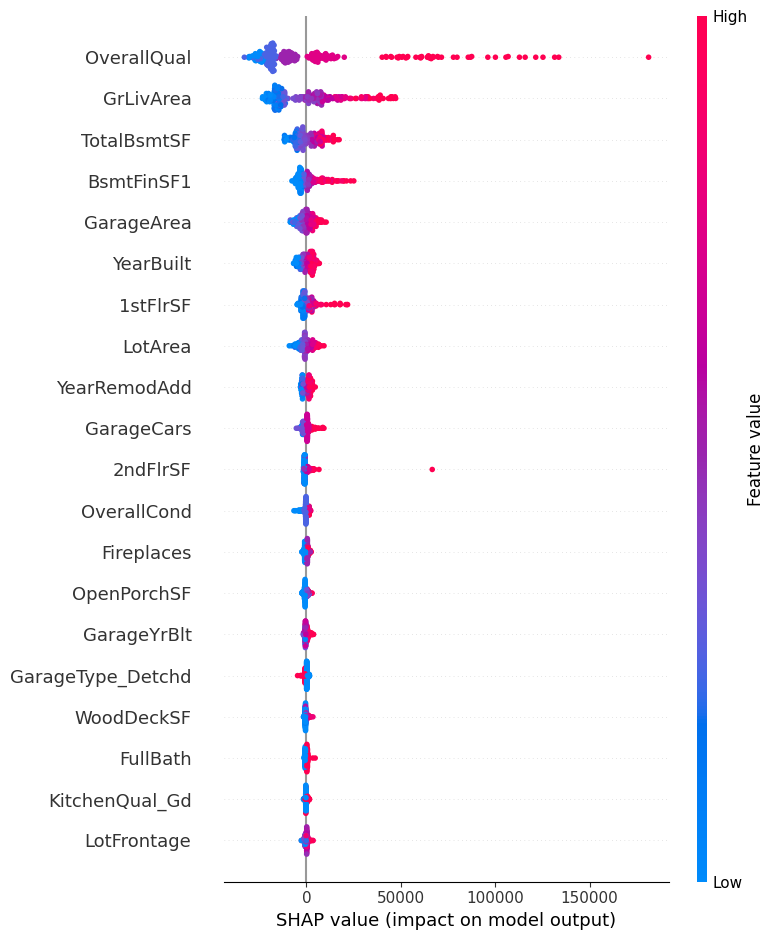

In [7]:
shap.summary_plot(shap_values, X_test)

### Tratando os dados

In [23]:
# Supondo que 'df_train' já foi carregado
# Identificar e converter a coluna para categoria
df_train['MSSubClass'] = df_train['MSSubClass'].astype('category')
df_train['OverallQual'] = df_train['OverallQual'].astype('category')
df_train['OverallCond'] = df_train['OverallCond'].astype('category')

### Treinando um Modelo

In [24]:
import shap
import numpy as np
import pandas as pd
# Calcular importância média absoluta dos valores SHAP
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Criar DataFrame com nome e importância
importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': shap_importance
})

# Ordenar da mais importante para a menos importante
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Printar só os nomes das features mais importantes (ex: top 20)
print("Principais features que influenciam o preço da casa:")
print(importance_df['feature'].head(20).to_list())


Principais features que influenciam o preço da casa:
['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'YearBuilt', '1stFlrSF', 'LotArea', 'YearRemodAdd', 'GarageCars', '2ndFlrSF', 'OverallCond', 'Fireplaces', 'OpenPorchSF', 'GarageYrBlt', 'GarageType_Detchd', 'WoodDeckSF', 'FullBath', 'KitchenQual_Gd', 'LotFrontage']


Exception ignored in: <function ResourceTracker.__del__ at 0x103d5f6a0>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/pj_conda/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/miniconda3/envs/pj_conda/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/miniconda3/envs/pj_conda/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10757b6a0>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/pj_conda/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/miniconda3/envs/pj_conda/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/miniconda3/envs/pj_conda/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception igno

In [10]:
feature = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'YearBuilt', 
 '1stFlrSF', 'LotArea', 'YearRemodAdd', 'GarageCars', '2ndFlrSF', 'OverallCond', 'Fireplaces', 
 'BsmtQual_Ex', 'OpenPorchSF', 'GarageYrBlt', 'GarageType_Detchd', 'LotFrontage', 'FullBath', 'GarageType_Attchd']

RandomForestRegressor

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

modelo = RandomForestRegressor(random_state=42)

# Espaço de busca mais amplo, mas com menos combinações testadas
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

search = RandomizedSearchCV(
    modelo,
    param_distributions=param_dist,
    n_iter=20,  # Testa só 20 combinações aleatórias
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1  # Usa todos os núcleos do processador
)

search.fit(X_train, y_train)

print("Melhores parâmetros:", search.best_params_)
print("Melhor RMSE (negativo):", search.best_score_)

Melhores parâmetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 125}
Melhor RMSE (negativo): -32727.421720413367


In [12]:
top_features = importance_df['feature'].head(20).to_list()
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

In [13]:
model_reduced = RandomForestRegressor(n_estimators=125, random_state=42, max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2 )
model_reduced.fit(X_train_reduced, y_train)

,n_estimators,125
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_reduced, X_train_reduced, y_train, cv=5, scoring='r2')
print(f"R² médio: {scores.mean():.4f}")

R² médio: 0.8443


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predição
y_pred = model.predict(X_test)

# R²
r2 = r2_score(y_test, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAE
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

R²: 0.8880
RMSE: 29305.59
MAE: 17657.76


Comparando RMSE e MAE: Perceba que o RMSE ($29.305,59) é bem maior que o MAE ($17.657,76). Essa diferença é importante. O RMSE penaliza mais os erros grandes, ou seja, desvios muito acima da média. A sua diferença significativa entre o RMSE e o MAE sugere que seu modelo cometeu alguns erros de previsão bastante altos para certos imóveis, os quais puxaram o valor do RMSE para cima.

R² de 0.8880: Esse é um resultado muito bom! O R² (Coeficiente de Determinação) de 0.8880 significa que 88,8% da variação no preço dos imóveis pode ser explicada pelo seu modelo. Um valor tão próximo de 1 indica que seu modelo tem um alto poder preditivo e está capturando muito bem a relação entre as variáveis de entrada e o preço.

**O que ele representa?** O valor de RMSE de 29305.59 significa que, em média, as previsões do seu modelo de preços de casas se desviam do preço real em aproximadamente $29,305.59 para mais ou para menos.

### Gráficos

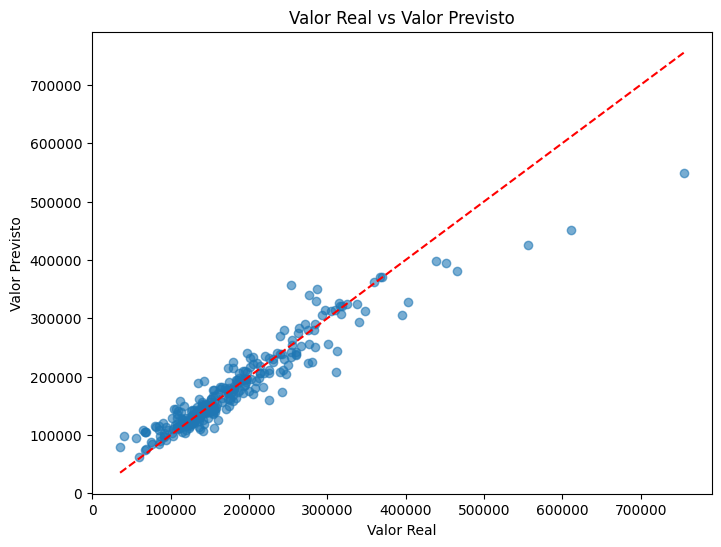

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # linha y=x
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Valor Real vs Valor Previsto')
plt.show()

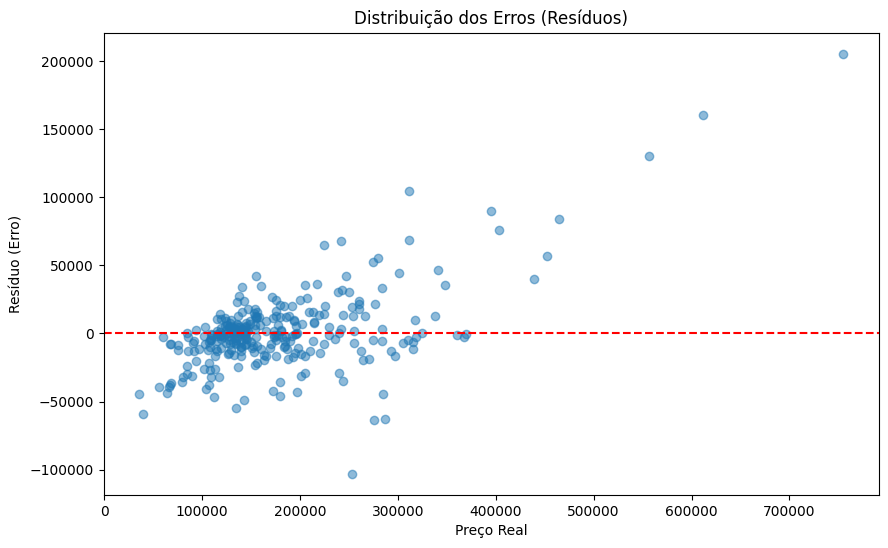

In [17]:
# Resíduos
residuals = y_test - y_pred

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Preço Real")
plt.ylabel("Resíduo (Erro)")
plt.title("Distribuição dos Erros (Resíduos)")
plt.show()

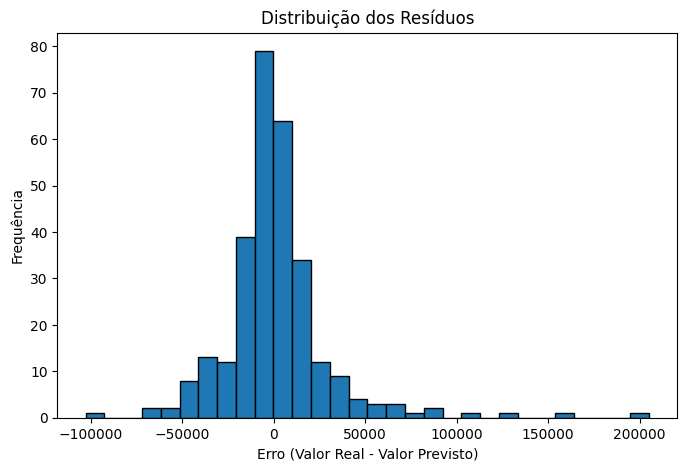

In [18]:
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Erro (Valor Real - Valor Previsto)')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos')
plt.show()

#### Kaggle

In [19]:
# Importando os dados de Teste
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


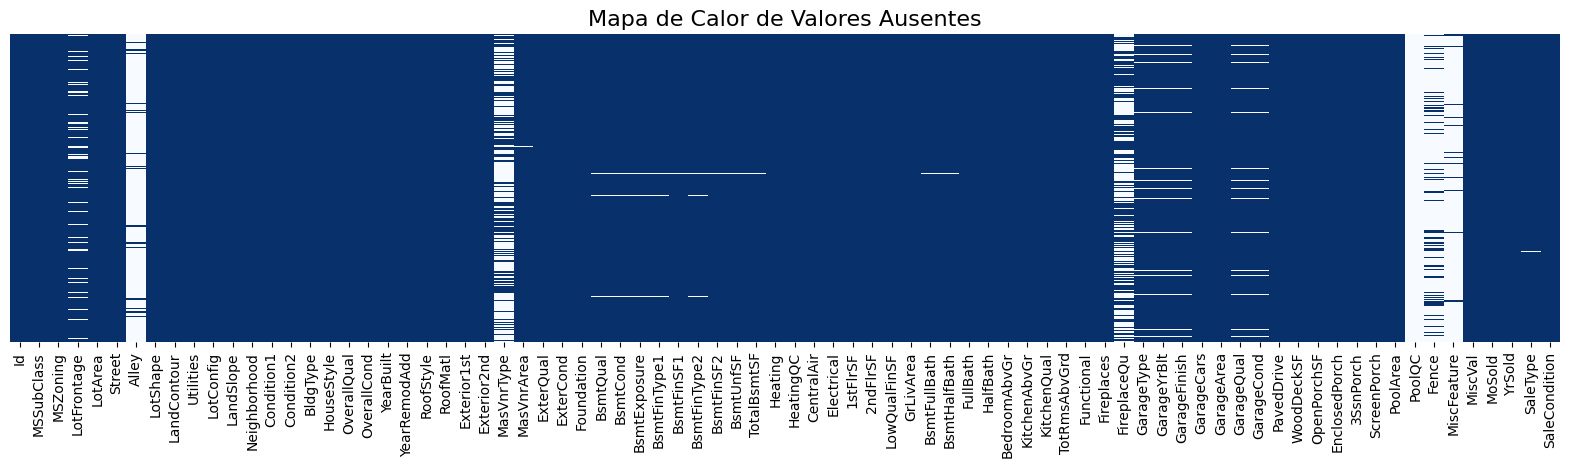

In [20]:
import seaborn as sns
plt.figure(figsize=(20, 4))
sns.heatmap(df_test.isnull(), cbar=False, cmap='Blues_r', yticklabels=False)
plt.title('Mapa de Calor de Valores Ausentes', fontsize=16)
plt.show()

In [21]:
# EDA

In [22]:
# Reaplica os mesmos pré-processamentos no test.csv
X_final_test = test[top_features]  # depois de codificar, imputar etc.

# Faz a previsão
preds = model_reduced.predict(X_final_test)

# Cria o CSV de submissão
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": preds
})
submission.to_csv("submission.csv", index=False)

NameError: name 'test' is not defined

In [ ]:
# Fazer previsões no conjunto de teste do Kaggle
y_train = model.predict(X_final_test)